# Strategia Regressione

<b><font color=RED size=+2>We predict returns and not prices!</font></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.linear_model import LinearRegression

In [2]:
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [3]:
df = api.get_history(instrument="EUR_USD", start="2023-01-01", 
                     end="2023-10-29" , granularity = "M5", price = "M")["c"].to_frame().dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61361 entries, 2021-01-03 22:00:00 to 2021-10-28 23:55:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c       61361 non-null  float64
dtypes: float64(1)
memory usage: 958.8 KB


<AxesSubplot:xlabel='time'>

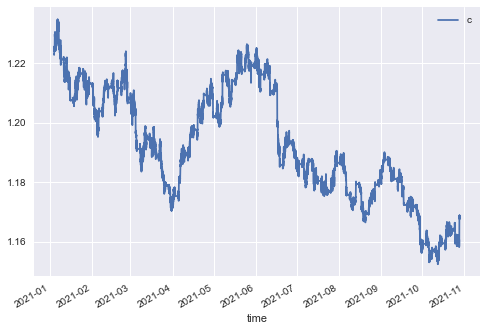

In [5]:
df.plot()

<AxesSubplot:xlabel='time'>

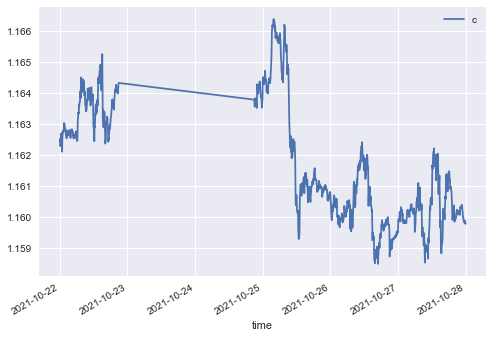

In [6]:
df.loc["2023-10-20":"2023-10-27"].plot()

In [7]:
df["logRet"]=np.log(df.c/df.c.shift(1))

In [8]:
df["logRet1"]=df.logRet.shift(1)

In [9]:
df

c    logRet   logRet1
time                                            
2021-01-03 22:00:00  1.22313       NaN       NaN
2021-01-03 22:05:00  1.22295 -0.000147       NaN
2021-01-03 22:10:00  1.22283 -0.000098 -0.000147
2021-01-03 22:15:00  1.22329  0.000376 -0.000098
2021-01-03 22:20:00  1.22333  0.000033  0.000376
...                      ...       ...       ...
2021-10-28 23:35:00  1.16849 -0.000103  0.000291
2021-10-28 23:40:00  1.16849  0.000000 -0.000103
2021-10-28 23:45:00  1.16833 -0.000137  0.000000
2021-10-28 23:50:00  1.16838  0.000043 -0.000137
2021-10-28 23:55:00  1.16813 -0.000214  0.000043

[61361 rows x 3 columns]

In [10]:
df.dropna(inplace=True)

(-0.0015, 0.0015)

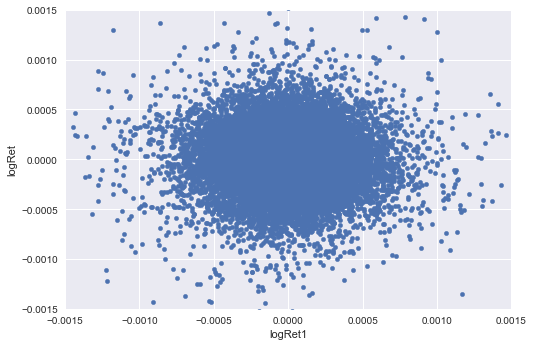

In [13]:
df.plot(kind="scatter",x="logRet1",y="logRet")
plt.xlim(-0.0015,0.0015)
plt.ylim(-0.0015,0.0015)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression(fit_intercept=True)

In [21]:
lm.fit(X=df.logRet1.to_frame(),y=df.logRet)

LinearRegression()

In [22]:
pendenza=float(lm.coef_)
intercetta=float(lm.intercept_)
intercetta, pendenza

(-7.80484892169034e-07, -0.04428388421726539)

In [23]:
df["predicted"]=lm.predict(df.logRet1.to_frame())

<AxesSubplot:xlabel='time'>

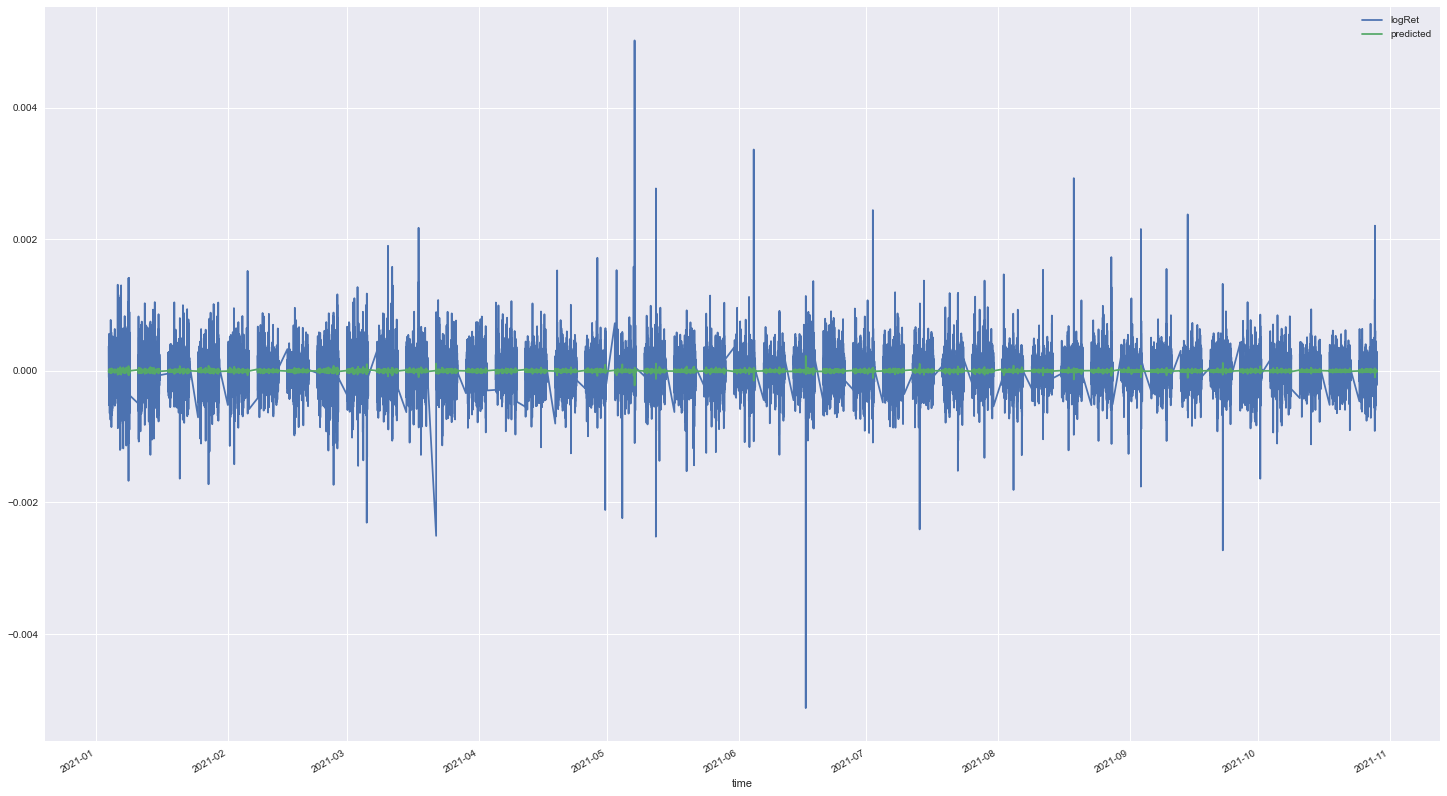

In [27]:
df[["logRet","predicted"]].plot(figsize=(25,15))

In [28]:
# cerchiamo di prevedere almeno la direzione
df["posizione"]=np.sign(lm.predict(df.logRet1.to_frame()))

In [30]:
df

c    logRet   logRet1  predicted
time                                                       
2021-01-03 22:10:00  1.22283 -0.000098 -0.000147        1.0
2021-01-03 22:15:00  1.22329  0.000376 -0.000098        1.0
2021-01-03 22:20:00  1.22333  0.000033  0.000376       -1.0
2021-01-03 22:25:00  1.22337  0.000033  0.000033       -1.0
2021-01-03 22:30:00  1.22327 -0.000082  0.000033       -1.0
...                      ...       ...       ...        ...
2021-10-28 23:35:00  1.16849 -0.000103  0.000291       -1.0
2021-10-28 23:40:00  1.16849  0.000000 -0.000103        1.0
2021-10-28 23:45:00  1.16833 -0.000137  0.000000       -1.0
2021-10-28 23:50:00  1.16838  0.000043 -0.000137        1.0
2021-10-28 23:55:00  1.16813 -0.000214  0.000043       -1.0

[61359 rows x 4 columns]

In [35]:
hits=np.sign(df.posizione*df.logRet) # -1 se ho sbagliato, +1 se ho fatto giusto
hits

time
2021-01-03 22:10:00   -1.0
2021-01-03 22:15:00    1.0
2021-01-03 22:20:00   -1.0
2021-01-03 22:25:00   -1.0
2021-01-03 22:30:00    1.0
                      ... 
2021-10-28 23:35:00    1.0
2021-10-28 23:40:00    0.0
2021-10-28 23:45:00    1.0
2021-10-28 23:50:00    1.0
2021-10-28 23:55:00    1.0
Length: 61359, dtype: float64

In [34]:
hits.value_counts()

 1.0    30814
-1.0    28695
 0.0     1850
dtype: int64

<AxesSubplot:xlabel='time'>

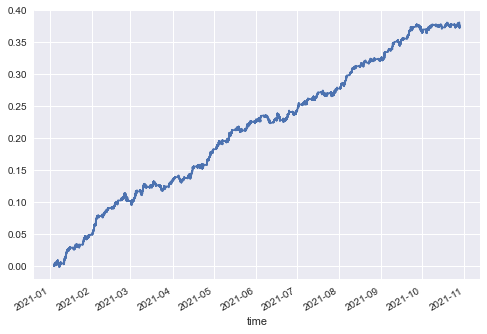

In [40]:
(df.posizione*df.logRet).cumsum().plot()

In [41]:
(df.posizione*df.logRet).sum()

0.37416157606148

In [42]:
((df.posizione*df.logRet).cumsum().cummax()-(df.posizione*df.logRet).cumsum()).max()

0.01847791128717316

# Regressione multilineare

In [44]:
df = api.get_history(instrument="EUR_USD", start="2021-01-01", 
                     end="2021-10-29" , granularity = "M5", price = "M")["c"].to_frame().dropna()

In [45]:
df["logRet"]=np.log(df.c/df.c.shift(1))

In [46]:
lags=5
colonne=[]
for lag in range(1,lags+1):
    col = "logRet"+str(lag)
    df[col]=df.logRet.shift(lag)
    colonne.append(col)
df.dropna(inplace=True)

In [47]:
df

c    logRet   logRet1   logRet2   logRet3  \
time                                                                   
2021-01-03 22:30:00  1.22327 -0.000082  0.000033  0.000033  0.000376   
2021-01-03 22:35:00  1.22337  0.000082 -0.000082  0.000033  0.000033   
2021-01-03 22:40:00  1.22328 -0.000074  0.000082 -0.000082  0.000033   
2021-01-03 22:45:00  1.22330  0.000016 -0.000074  0.000082 -0.000082   
2021-01-03 22:50:00  1.22318 -0.000098  0.000016 -0.000074  0.000082   
...                      ...       ...       ...       ...       ...   
2021-10-28 23:35:00  1.16849 -0.000103  0.000291  0.000026  0.000009   
2021-10-28 23:40:00  1.16849  0.000000 -0.000103  0.000291  0.000026   
2021-10-28 23:45:00  1.16833 -0.000137  0.000000 -0.000103  0.000291   
2021-10-28 23:50:00  1.16838  0.000043 -0.000137  0.000000 -0.000103   
2021-10-28 23:55:00  1.16813 -0.000214  0.000043 -0.000137  0.000000   

                      logRet4   logRet5  
time                                     
2021-01-03 22:30:00 -0.000098 -0.000147  
2021-01-03 22:35:00  0.000376 -0.000098  
2021-01-03 22:40:00  0.000033  0.000376  
2021-01-03 22:45:00  0.000033  0.000033  
2021-01-03 22:50:00 -0.000082  0.000033  
...                       ...       ...  
2021-10-28 23:35:00  0.000026  0.000068  
2021-10-28 23:40:00  0.000009  0.000026  
2021-10-28 23:45:00  0.000026  0.000009  
2021-10-28 23:50:00  0.000291  0.000026  
2021-10-28 23:55:00 -0.000103  0.000291  

[61355 rows x 7 columns]

In [49]:
lm = LinearRegression(fit_intercept=True)

In [50]:
lm.fit(X=df[colonne],y=df.logRet)

LinearRegression()

In [51]:
lm.coef_

array([-0.04478294, -0.01397677,  0.00824122, -0.00129882,  0.00275532])

In [52]:
lm.intercept_

-7.899068276477207e-07

In [54]:
df["predicted"]=lm.predict(df[colonne])

<AxesSubplot:xlabel='time'>

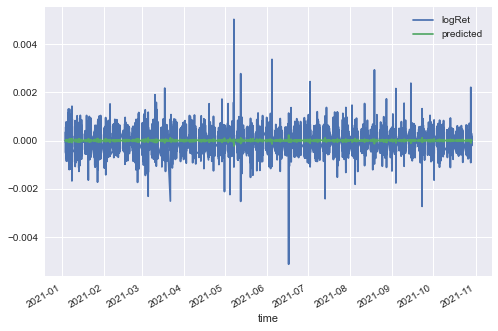

In [57]:
df[["logRet","predicted"]].plot()

In [58]:
# cerchiamo di prevedere almeno la direzione
df["posizione"]=np.sign(lm.predict(df[colonne]))

In [61]:
hits=np.sign(df.posizione*df.logRet) # -1 se ho sbagliato, +1 se ho fatto giusto
hits.value_counts()

 1.0    30945
-1.0    28560
 0.0     1850
dtype: int64

<AxesSubplot:xlabel='time'>

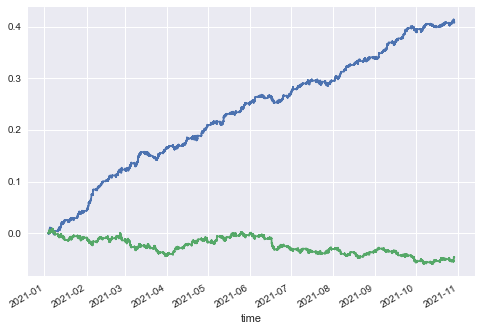

In [67]:
(df.posizione*df.logRet).cumsum().plot()
df.logRet.cumsum().plot()

In [63]:
(df.posizione*df.logRet).sum()

0.40828665043348156

In [93]:
comm=0.0
spread=0.00008/df.c.mean() 
df["transazioni"]= abs(df.posizione-df.posizione.shift(1))

In [69]:
df

c    logRet   logRet1   logRet2   logRet3  \
time                                                                   
2021-01-03 22:30:00  1.22327 -0.000082  0.000033  0.000033  0.000376   
2021-01-03 22:35:00  1.22337  0.000082 -0.000082  0.000033  0.000033   
2021-01-03 22:40:00  1.22328 -0.000074  0.000082 -0.000082  0.000033   
2021-01-03 22:45:00  1.22330  0.000016 -0.000074  0.000082 -0.000082   
2021-01-03 22:50:00  1.22318 -0.000098  0.000016 -0.000074  0.000082   
...                      ...       ...       ...       ...       ...   
2021-10-28 23:35:00  1.16849 -0.000103  0.000291  0.000026  0.000009   
2021-10-28 23:40:00  1.16849  0.000000 -0.000103  0.000291  0.000026   
2021-10-28 23:45:00  1.16833 -0.000137  0.000000 -0.000103  0.000291   
2021-10-28 23:50:00  1.16838  0.000043 -0.000137  0.000000 -0.000103   
2021-10-28 23:55:00  1.16813 -0.000214  0.000043 -0.000137  0.000000   

                      logRet4   logRet5  predicted  trades  
time                                                        
2021-01-03 22:30:00 -0.000098 -0.000147        1.0     NaN  
2021-01-03 22:35:00  0.000376 -0.000098        1.0     0.0  
2021-01-03 22:40:00  0.000033  0.000376       -1.0     2.0  
2021-01-03 22:45:00  0.000033  0.000033        1.0     2.0  
2021-01-03 22:50:00 -0.000082  0.000033        1.0     0.0  
...                       ...       ...        ...     ...  
2021-10-28 23:35:00  0.000026  0.000068       -1.0     0.0  
2021-10-28 23:40:00  0.000009  0.000026        1.0     2.0  
2021-10-28 23:45:00  0.000026  0.000009        1.0     0.0  
2021-10-28 23:50:00  0.000291  0.000026        1.0     0.0  
2021-10-28 23:55:00 -0.000103  0.000291        1.0     0.0  

[61355 rows x 9 columns]

<AxesSubplot:xlabel='time'>

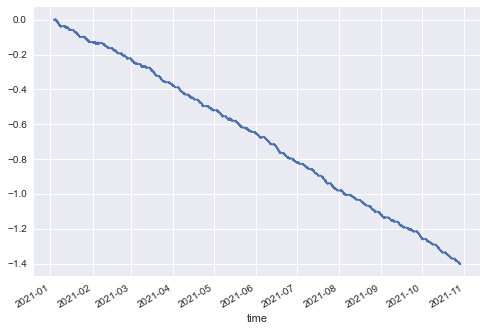

In [77]:
(df.posizione*df.logRet-df.transazioni*(comm+spread/2)).cumsum().plot()

In [79]:
(df.posizione*df.logRet).sum()

0.40828665043348156

In [80]:
(df.transazioni*(comm+spread/2)).sum()

1.8120875624017685

In [104]:
df2 = api.get_history(instrument="EUR_USD", start="2023-01-01", 
                     end="2023-10-29" , granularity = "H3", price = "M")["c"].to_frame().dropna()
df2["logRet"]=np.log(df2.c/df2.c.shift(1))
lags=5
colonne=[]
for lag in range(1,lags+1):
    col = "logRet"+str(lag)
    df2[col]=df2.logRet.shift(lag)
    colonne.append(col)
df2.dropna(inplace=True)
lm = LinearRegression(fit_intercept=True)
lm.fit(X=df2[colonne],y=df2.logRet)
df2["posizione"]=np.sign(lm.predict(df2[colonne]))
df2["transazioni"]= abs(df2.posizione-df2.posizione.shift(1))

<AxesSubplot:xlabel='time'>

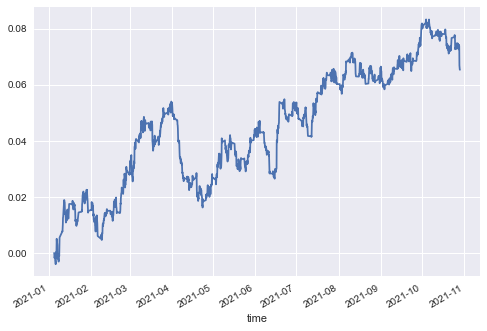

In [105]:
(df2.posizione*df2.logRet-df2.transazioni*(comm+spread/2)).cumsum().plot()

# Forward testing

In [125]:
# ATTENZIONE che lo addestriamo sui dati dell'anno precedente
train = api.get_history(instrument="EUR_USD", start="2022-01-01", 
                     end="2022-10-29" , granularity = "H3", price = "M")["c"].to_frame().dropna()
train["logRet"]=np.log(train.c/train.c.shift(1))
lags=5
colonne=[]
for lag in range(1,lags+1):
    col = "logRet"+str(lag)
    train[col]=train.logRet.shift(lag)
    colonne.append(col)
train.dropna(inplace=True)
lm2022 = LinearRegression(fit_intercept=True)
lm2022.fit(X=train[colonne],y=train.logRet)

LinearRegression()

In [126]:
test = api.get_history(instrument="EUR_USD", start="2023-01-01", 
                     end="2023-10-29" , granularity = "H3", price = "M")["c"].to_frame().dropna()
test["logRet"]=np.log(test.c/test.c.shift(1))
lags=5
colonne=[]
for lag in range(1,lags+1):
    col = "logRet"+str(lag)
    test[col]=test.logRet.shift(lag)
    colonne.append(col)
test.dropna(inplace=True)

# attenzione che NON RIFACCIO il modello

test["posizione"]=np.sign(lm2022.predict(test[colonne])) 
test["transazioni"]= abs(test.posizione-test.posizione.shift(1))

<AxesSubplot:xlabel='time'>

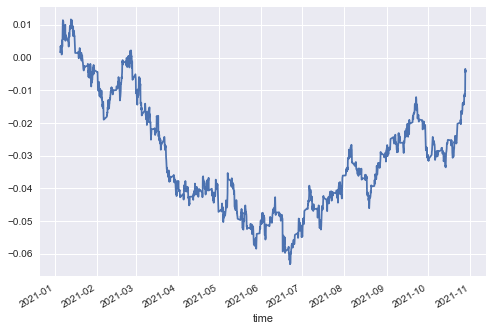

In [127]:
(test.posizione*test.logRet).cumsum().plot()

<AxesSubplot:xlabel='time'>

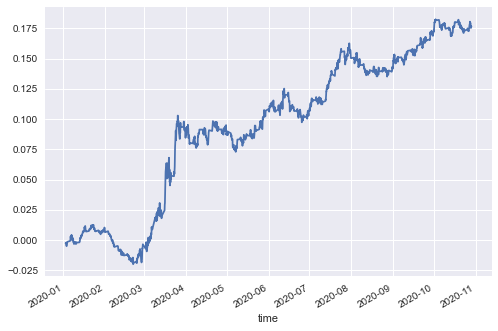

In [129]:
# soltanto per MOSTRARE CHE NON è TESTATO SUI DATI DEL 2022, mostriamo anche il rendimento cumulato del 2022
train["posizione"]=np.sign(lm2022.predict(train[colonne])) 
(train.posizione*train.logRet).cumsum().plot()